## Loading data and EDA

In [1]:
import gc
gc.collect()

from utils.mnist_reader import load_mnist

import numpy as np
import pandas as pd
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', 500)

import matplotlib.pyplot as plt
import seaborn as sns

import umap

from sklearn.manifold import TSNE

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import shap

C:\Users\yamin\.conda\envs\py39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
RANDOM_STATE = 10

# Set this as per your processor cores
N_JOBS = 4

#### Loading training and testing data

In [3]:
X_train, y_train = load_mnist('data/fashion', kind='train')
X_test, y_test = load_mnist('data/fashion', kind='t10k')

In [4]:
labels = { 0: 'T-shirt/top',
          1: 'Trouser',
          2: 'Pullover',
          3: 'Dress',
          4: 'Coat', 
          5: 'Sandal',
          6: 'Shirt',
          7: 'Sneaker',
          8 : 'Bag',
          9 : 'Ankle boot'}

#### Exploring data

In [6]:
print("X_train shape : ", X_train.shape)
print("y_train shape : ", y_train.shape)

print("X_test shape : ", X_test.shape)
print("y_test shape : ", y_test.shape)

X_train shape :  (60000, 784)
y_train shape :  (60000,)
X_test shape :  (10000, 784)
y_test shape :  (10000,)


In [7]:
df_X_train =  pd.DataFrame(X_train)
df_y_train = pd.DataFrame(y_train)

df_X_test =  pd.DataFrame(X_test)
df_y_test = pd.DataFrame(y_test)

df_X_train = df_X_train.add_prefix("pixel_")
df_X_train.head(20)

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,22,...,0,0,0,0,133,167,73,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,1,0,0,0,...,0,0,3,0,82,237,231,70,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- Looking at the dimention of the data, seems like the images are flattened.
- Each image is represented as a row with 784 columns (28 * 28 = 784), each column containing a pixel density.

- Let's try to rehsape and visualize few images along with the label.

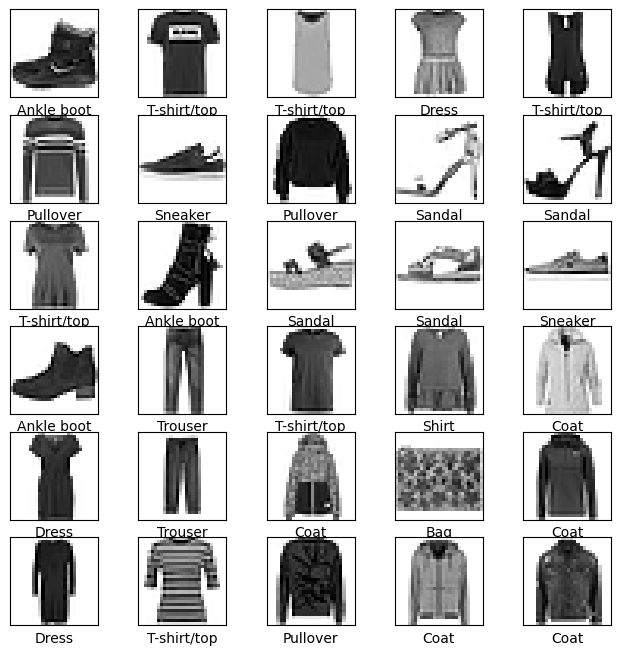

In [8]:
plt.figure(figsize=(8, 8))
# Show only the first 30 pictures
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(labels[y_train[i]])

### UMAP for dimentionality reduction for data visualization

#### Need to install library --> pip install umap-learn

Uniform Manifold Approximation and Projection (UMAP) is a dimension reduction technique that can be used for visualisation similarly to t-SNE, but also for general non-linear dimension reduction.

In [10]:
umap_reduce = umap.UMAP(random_state = RANDOM_STATE, n_jobs = N_JOBS)

## Takes 3-4 minutes to fit
df_X_train_embedding = umap_reduce.fit_transform(df_X_train)

n_jobs value 6 overridden to 1 by setting random_state. Use no seed for parallelism.


In [11]:
df_X_train_embedding = pd.DataFrame(df_X_train_embedding)

df_X_train_embedding['class'] = y_train

df_X_train_embedding['class'].replace(labels, inplace=True)

df_X_train_embedding.head()

,0,1,class
0,-0.832442,3.003447,Ankle boot
1,15.414407,3.586854,T-shirt/top
2,10.481043,4.054356,T-shirt/top
3,11.501744,4.422289,Dress
4,11.551601,6.040695,T-shirt/top


#### Above table shows data reduced to 2-dim

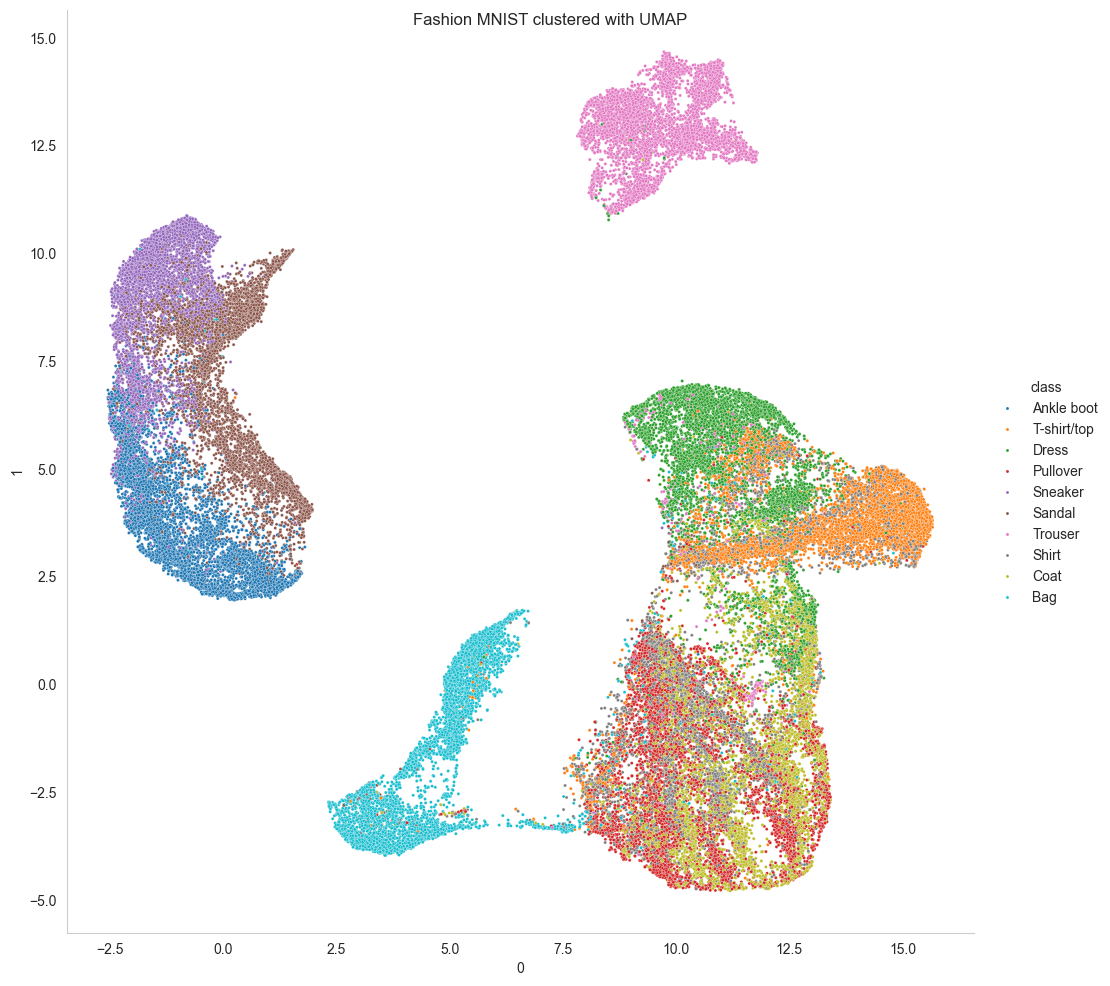

In [12]:
sns.set_style("whitegrid", {'axes.grid' : False})

#adjusting plot dots with plot_kws
ax = sns.pairplot(x_vars = [0], #column 0
                  y_vars = [1], #column 1
                  data = df_X_train_embedding, 
                  hue = "class",
                  height=10,
                  plot_kws={"s": 5});

ax.fig.suptitle('Fashion MNIST clustered with UMAP') ;

### TSNE for dimentionality reduction for data visualization

t-SNE (t-distributed Stochastic Neighbor Embedding) is an unsupervised non-linear dimensionality reduction technique for data exploration and visualizing high-dimensional data.

In [15]:
tsne_reduce = TSNE(random_state = RANDOM_STATE, n_jobs = N_JOBS)

## Takes 3-4 minutes to fit
df_X_train_tsne = tsne_reduce.fit_transform(X_train)

In [16]:
df_X_train_tsne = pd.DataFrame(df_X_train_tsne)

df_X_train_tsne['class'] = y_train

df_X_train_tsne['class'].replace(labels, inplace=True)

df_X_train_tsne.head()

,0,1,class
0,-42.975620,73.884827,Ankle boot
1,65.120453,-73.576805,T-shirt/top
2,-1.271179,-26.205639,T-shirt/top
3,10.124767,-31.240810,Dress
4,4.984655,-65.608162,T-shirt/top


#### Above table shows data reduced to 2-dim

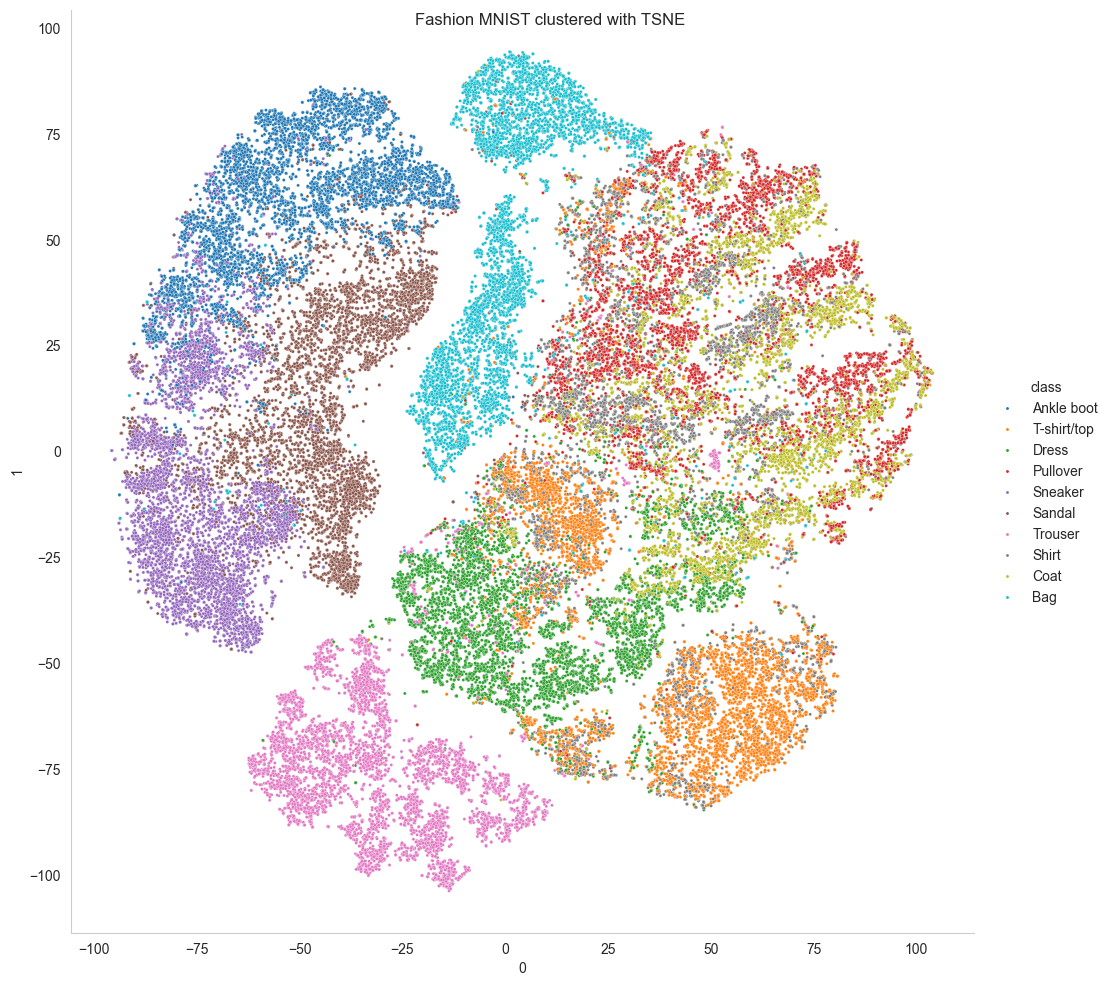

In [17]:
sns.set_style("whitegrid", {'axes.grid' : False})

#adjusting plot dots with plot_kws
ax = sns.pairplot(x_vars = [0], #column 0
                  y_vars = [1], #column 1
                  data = df_X_train_tsne, 
                  hue = "class",
                  height=10,
                  plot_kws={"s": 5});

ax.fig.suptitle('Fashion MNIST clustered with TSNE') ;

#### By above plot we can observe similarity between T-shirt/top, Pullover, Shirt, and Coat, when represented in 2-dim.

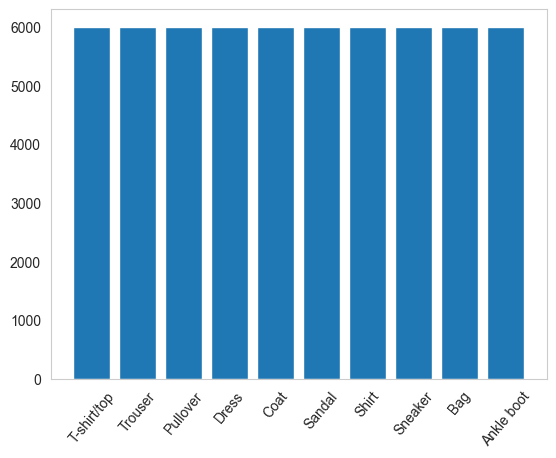

In [18]:
plt.bar(
    list(labels.values()),
    list(df_y_train.value_counts().values),
#     width = .5
    )
plt.xticks(rotation = 50)
plt.show()

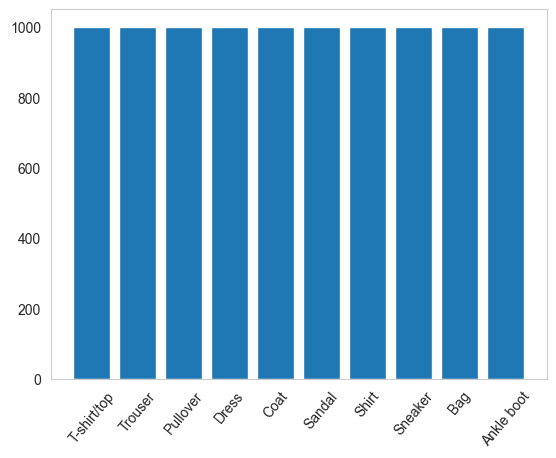

In [19]:
plt.bar(
    list(labels.values()),
    list(df_y_test.value_counts().values),
#     width = .5
    )
plt.xticks(rotation = 50)
plt.show()

#### Above bar charts shows that we have a completely balanced test and train dataset.

### Data prepration for modelling

- We will use complete training data for model training.
- We will split the test data in half to create validation set and test set.

In [20]:
X_val, X_test_fin, y_val, y_test_fin = train_test_split(X_test,
                                                    y_test,
                                                    stratify = y_test, # To get balanced data by classes in two datasets.
                                                    test_size = 0.5,
                                                    random_state = RANDOM_STATE)

In [21]:
print("X_val shape : ", X_val.shape)
print("y_val shape : ", y_val.shape)

print("X_test_fin shape : ", X_test_fin.shape)
print("y_test_fin shape : ", y_test_fin.shape)

X_val shape :  (5000, 784)
y_val shape :  (5000,)
X_test_fin shape :  (5000, 784)
y_test_fin shape :  (5000,)


In [22]:
pd.DataFrame(y_test_fin).value_counts()

0    500
1    500
2    500
3    500
4    500
5    500
6    500
7    500
8    500
9    500
Name: count, dtype: int64

We can see above that the different classes have balanced data after splitting

## Experiments with models

### Baseline models

#### XGBoost baseline model

In [23]:
xgb_base = XGBClassifier(random_state = RANDOM_STATE,
                         n_jobs = N_JOBS,
                         early_stopping_rounds = 10,
                         verbosity = 1)

In [24]:
## Takes 2-3 minutes
xgb_base.fit(X_train, y_train, eval_set = [(X_val, y_val)])

[0]	validation_0-mlogloss:1.41879
[1]	validation_0-mlogloss:1.13012
[2]	validation_0-mlogloss:0.94351
[3]	validation_0-mlogloss:0.81011
[4]	validation_0-mlogloss:0.71434
[5]	validation_0-mlogloss:0.64201
[6]	validation_0-mlogloss:0.58792
[7]	validation_0-mlogloss:0.54459
[8]	validation_0-mlogloss:0.50953
[9]	validation_0-mlogloss:0.48074
[10]	validation_0-mlogloss:0.45633
[11]	validation_0-mlogloss:0.43791
[12]	validation_0-mlogloss:0.42181
[13]	validation_0-mlogloss:0.40936
[14]	validation_0-mlogloss:0.39833
[15]	validation_0-mlogloss:0.38931
[16]	validation_0-mlogloss:0.38112
[17]	validation_0-mlogloss:0.37313
[18]	validation_0-mlogloss:0.36698
[19]	validation_0-mlogloss:0.36104
[20]	validation_0-mlogloss:0.35683
[21]	validation_0-mlogloss:0.35219
[22]	validation_0-mlogloss:0.34845
[23]	validation_0-mlogloss:0.34494
[24]	validation_0-mlogloss:0.34101
[25]	validation_0-mlogloss:0.33767
[26]	validation_0-mlogloss:0.33561
[27]	validation_0-mlogloss:0.33293
[28]	validation_0-mlogloss:0.3

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=4,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [25]:
print("Minimum Validation loss : ", xgb_base.best_score)
print("Best optimization iteration : ", xgb_base.best_iteration)

Minimum Validation loss :  0.2881317528048692
Best optimization iteration :  97


In [26]:
y_pred_train_xgb_base = xgb_base.predict(X_train)

print("Accuracy on train set : ", accuracy_score(y_train, y_pred_train_xgb_base))
print("\n")

print("Confustion Matrix on train set : \n", confusion_matrix(y_train, y_pred_train_xgb_base))
print("\n")

print("Classification Report on train set : \n", classification_report(y_train, y_pred_train_xgb_base))

Accuracy on train set :  0.99965
####################################################################################################


Confustion Matrix on train set : 
 [[5997    0    0    1    0    0    2    0    0    0]
 [   0 6000    0    0    0    0    0    0    0    0]
 [   1    0 5994    0    4    0    1    0    0    0]
 [   0    0    0 5999    1    0    0    0    0    0]
 [   0    0    0    0 5999    0    1    0    0    0]
 [   0    0    0    0    0 6000    0    0    0    0]
 [   3    0    3    1    3    0 5990    0    0    0]
 [   0    0    0    0    0    0    0 6000    0    0]
 [   0    0    0    0    0    0    0    0 6000    0]
 [   0    0    0    0    0    0    0    0    0 6000]]
####################################################################################################


Classification Report on train set : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6000
           1       1.00      1.00      1.00    

In [27]:
y_pred_test_xgb_base = xgb_base.predict(X_test_fin)

print("Accuracy on test set : ", accuracy_score(y_test_fin, y_pred_test_xgb_base))
print("\n")

print("Confustion Matrix on test set : \n", confusion_matrix(y_test_fin, y_pred_test_xgb_base))
print("\n")

print("Classification Report on test set : \n", classification_report(y_test_fin, y_pred_test_xgb_base))

Accuracy on test set :  0.8968
####################################################################################################


Confustion Matrix on test set : 
 [[441   0   5  11   0   0  40   0   3   0]
 [  1 488   0   8   1   0   1   0   1   0]
 [  6   1 413   3  42   0  34   0   1   0]
 [ 10   1   4 455  11   0  18   0   1   0]
 [  1   0  44  12 413   0  30   0   0   0]
 [  0   0   0   0   0 489   1   6   0   4]
 [ 61   1  50  10  44   0 327   0   7   0]
 [  0   0   0   0   0   2   0 485   0  13]
 [  0   1   1   1   3   0   4   2 488   0]
 [  0   0   0   0   0   2   0  13   0 485]]
####################################################################################################


Classification Report on test set : 
               precision    recall  f1-score   support

           0       0.85      0.88      0.86       500
           1       0.99      0.98      0.98       500
           2       0.80      0.83      0.81       500
           3       0.91      0.91      0.91

In [28]:
print(labels)

{0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}


<H3> Observations from baseline XGBoost model.</H3>

Accuracy and F1-scores vary quite a bit between train and test set predictions, indicating overfiiting.

By looking at the confusion matrix, we can observe the classes with most mis-classified rows in test set are:
- 6 = Shirt
- 2 = Pullover
- 4 = Coat
- 0 = T-shirt/top
- 3 = Dress

Durinig the EDA by visualizing data after dimentionality reduction using TSNE, we observed similarity between T-shirt/top, Pulloveer, Shirt, and Coat, when represented in 2-dim.

#### RandomForest baseline model

In [29]:
rf_base = RandomForestClassifier(random_state = RANDOM_STATE,
                                 n_jobs = N_JOBS,
                                 verbose = 1)

In [30]:
# Takes around 1 minutes
rf_base.fit(X_train, y_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   24.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   56.4s finished


RandomForestClassifier(n_jobs=4, random_state=10, verbose=1)

In [31]:
y_pred_train_rf_base = rf_base.predict(X_train)

print("Accuracy on train set : ", accuracy_score(y_train, y_pred_train_rf_base))
print("\n")

print("Confustion Matrix on train set : \n", confusion_matrix(y_train, y_pred_train_rf_base))
print("\n")

print("Classification Report on train set : \n", classification_report(y_train, y_pred_train_rf_base))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s


Accuracy on train set :  1.0
####################################################################################################


Confustion Matrix on train set : 
 [[6000    0    0    0    0    0    0    0    0    0]
 [   0 6000    0    0    0    0    0    0    0    0]
 [   0    0 6000    0    0    0    0    0    0    0]
 [   0    0    0 6000    0    0    0    0    0    0]
 [   0    0    0    0 6000    0    0    0    0    0]
 [   0    0    0    0    0 6000    0    0    0    0]
 [   0    0    0    0    0    0 6000    0    0    0]
 [   0    0    0    0    0    0    0 6000    0    0]
 [   0    0    0    0    0    0    0    0 6000    0]
 [   0    0    0    0    0    0    0    0    0 6000]]
####################################################################################################


Classification Report on train set : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6000
           1       1.00      1.00      1.00      60

[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.7s finished


In [32]:
y_pred_test_rf_base = rf_base.predict(X_test_fin)

print("Accuracy on test set : ", accuracy_score(y_test_fin, y_pred_test_rf_base))
print("\n")

print("Confustion Matrix on test set : \n", confusion_matrix(y_test_fin, y_pred_test_rf_base))
print("\n")

print("Classification Report on test set : \n", classification_report(y_test_fin, y_pred_test_rf_base))

Accuracy on test set :  0.8754
####################################################################################################


Confustion Matrix on test set : 
 [[436   0   5  14   0   1  40   0   4   0]
 [  2 478   0  15   1   0   3   0   1   0]
 [  3   0 399   8  63   0  26   0   1   0]
 [  9   1   7 455  13   0  14   0   1   0]
 [  0   0  56  13 401   0  28   0   2   0]
 [  0   0   0   1   0 482   0  13   0   4]
 [ 69   0  56  13  59   0 291   0  12   0]
 [  0   0   0   0   0   7   0 475   0  18]
 [  0   1   3   1   3   1   3   2 486   0]
 [  0   0   0   0   0   4   0  20   2 474]]
####################################################################################################


Classification Report on test set : 
               precision    recall  f1-score   support

           0       0.84      0.87      0.86       500
           1       1.00      0.96      0.98       500
           2       0.76      0.80      0.78       500
           3       0.88      0.91      0.89

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


<H3> Observations from baseline RandomForest model.</H3>

Observations are similar between the results of XGBoost and RandomForest

Accuracy and F1-scores vary quite a bit between train and test set predictions, indicating overfiiting.

By looking at the confusion matrix, we can observe the classes with most mis-classified rows in test set are:
- 6 = Shirt
- 2 = Pullover
- 4 = Coat
- 0 = T-shirt/top
- 3 = Dress

Durinig the EDA by visualizing data after dimentionality reduction using TSNE, we observed similarity between T-shirt/top, Pulloveer, Shirt, and Coat, when represented in 2-dim.

## Model tuning and optimization

We will only optimize XGBoost and not Random Forest, as XGBoost showed better performance in baseline model.

#### Enable below code to run grid search

In [30]:
# xgb_grid_parameters = {"max_depth" : [5],
#                        "n_estimators" : [100],
# #                        "early_stopping_rounds" : [10],
#                        "reg_lambda" : [0.001, 0.01, 0.1, 1, 10], # L2/ Ridge regularization
#                        "colsample_bytree" : [0.8, 0.9]
#                       }

# kFold = StratifiedKFold(n_splits = 6)

In [31]:
# xgb_model_gs01 = GridSearchCV(estimator = XGBClassifier(random_state = RANDOM_STATE,
#                                                         verbose = 1,
#                                                         early_stopping_rounds = 10,
# #                                                         tree_method = "gpu_hist",
# #                                                         predictor = "gpu_predictor",
# #                                                         device = "cuda",
# #                                                         gpu_id = 0
#                                                        ),
#                               param_grid = xgb_grid_parameters,
#                               cv = kFold,
#                               scoring = "f1_weighted",
#                               n_jobs = N_JOBS,
#                               verbose = 1
#                               )

In [32]:
# ## Takes around 1 hr
# xgb_model_gs01.fit(X_train, y_train, eval_set = [(X_val, y_val)])

In [33]:
# print("Best Parameters as per grid search : ", xgb_model_gs01.best_params_)

In [34]:
# y_pred_train_xgb_gs01 = xgb_model_gs01.predict(X_train)

# print("Accuracy on train set : ", accuracy_score(y_train, y_pred_train_xgb_gs01))
# print("\n")

# print("Confustion Matrix on train set : \n", confusion_matrix(y_train, y_pred_train_xgb_gs01))
# print("\n")

# print("Classification Report on train set : \n", classification_report(y_train, y_pred_train_xgb_gs01))

In [35]:
# y_pred_test_xgb_gs01 = xgb_model_gs01.predict(X_test_fin)

# print("Accuracy on test set : ", accuracy_score(y_test_fin, y_pred_test_xgb_gs01))
# print("\n")

# print("Confustion Matrix on test set : \n", confusion_matrix(y_test_fin, y_pred_test_xgb_gs01))
# print("\n")

# print("Classification Report on test set : \n", classification_report(y_test_fin, y_pred_test_xgb_gs01))

<H3> Above results are similar even with parameter selection using grid search. </H3>

### Training model with best parameters from grid search

To do : Plot learning curves to chose regularization parameter.

In [36]:
xgb_model_fin = XGBClassifier(random_state = RANDOM_STATE,
                              n_jobs = N_JOBS,
                              verbose = 1,
                              early_stopping_rounds = 10,
                              colsample_bytree = 0.9,
                              max_depth = 5,
                              n_estimators = 100,
                              reg_lambda = 10,
#                               tree_method = "gpu_hist",
#                               predictor = "gpu_predictor",
#                               device = "cuda",
#                               gpu_id = 0
                              )

In [37]:
xgb_model_fin.fit(X_train,
                  y_train,
                  eval_set = [(X_val, y_val)],
                  verbose = 1
                 )

C:\Shivagya\Softwares\Anaconda\envs\py310\lib\site-packages\xgboost\core.py:160: UserWarning: [18:59:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-mlogloss:1.48058
[1]	validation_0-mlogloss:1.18989
[2]	validation_0-mlogloss:1.00325
[3]	validation_0-mlogloss:0.86991
[4]	validation_0-mlogloss:0.77338
[5]	validation_0-mlogloss:0.69806
[6]	validation_0-mlogloss:0.64067
[7]	validation_0-mlogloss:0.59296
[8]	validation_0-mlogloss:0.55481
[9]	validation_0-mlogloss:0.52463
[10]	validation_0-mlogloss:0.49887
[11]	validation_0-mlogloss:0.47902
[12]	validation_0-mlogloss:0.46090
[13]	validation_0-mlogloss:0.44608
[14]	validation_0-mlogloss:0.43299
[15]	validation_0-mlogloss:0.42214
[16]	validation_0-mlogloss:0.41229
[17]	validation_0-mlogloss:0.40312
[18]	validation_0-mlogloss:0.39594
[19]	validation_0-mlogloss:0.38903
[20]	validation_0-mlogloss:0.38394
[21]	validation_0-mlogloss:0.37830
[22]	validation_0-mlogloss:0.37323
[23]	validation_0-mlogloss:0.36873
[24]	validation_0-mlogloss:0.36378
[25]	validation_0-mlogloss:0.35978
[26]	validation_0-mlogloss:0.35646
[27]	validation_0-mlogloss:0.35301
[28]	validation_0-mlogloss:0.3

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=6,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [67]:
y_pred_train_xgb_fin = xgb_model_fin.predict(X_train)

print("Accuracy on train set : ", accuracy_score(y_train, y_pred_train_xgb_fin))
print("\n")

print("Confustion Matrix on train set : \n", confusion_matrix(y_train, y_pred_train_xgb_fin))
print("\n")

print("Classification Report on train set : \n", classification_report(y_train, y_pred_train_xgb_fin))

Accuracy on train set :  0.9846833333333334
####################################################################################################


Confustion Matrix on train set : 
 [[5890    0   16   23    6    0   63    0    2    0]
 [   0 6000    0    0    0    0    0    0    0    0]
 [  18    0 5806   11  117    0   48    0    0    0]
 [  14    0    2 5951   23    0   10    0    0    0]
 [   3    0   82   26 5826    0   63    0    0    0]
 [   0    0    0    0    0 6000    0    0    0    0]
 [ 157    0  116   36   80    0 5611    0    0    0]
 [   0    0    0    0    0    0    0 5999    1    0]
 [   0    0    0    1    0    0    1    0 5998    0]
 [   0    0    0    0    0    0    0    0    0 6000]]
####################################################################################################


Classification Report on train set : 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      6000
           1       1.00      1.00   

In [68]:
y_pred_test_xgb_fin = xgb_model_fin.predict(X_test_fin)

print("Accuracy on test set : ", accuracy_score(y_test_fin, y_pred_test_xgb_fin))
print("\n")

print("Confustion Matrix on test set : \n", confusion_matrix(y_test_fin, y_pred_test_xgb_fin))
print("\n")

print("Classification Report on test set : \n", classification_report(y_test_fin, y_pred_test_xgb_fin))

Accuracy on test set :  0.8912
####################################################################################################


Confustion Matrix on test set : 
 [[435   0   5  10   0   1  46   0   3   0]
 [  1 486   0   9   1   0   2   0   1   0]
 [  4   0 413   7  39   0  36   0   1   0]
 [  9   1   7 456  10   0  16   0   1   0]
 [  0   0  45  12 412   0  31   0   0   0]
 [  0   0   0   1   0 487   0   7   0   5]
 [ 66   1  49  13  52   0 312   0   7   0]
 [  0   0   0   0   0   3   0 482   0  15]
 [  2   1   2   0   4   0   1   2 488   0]
 [  0   0   0   0   0   1   0  13   1 485]]
####################################################################################################


Classification Report on test set : 
               precision    recall  f1-score   support

           0       0.84      0.87      0.86       500
           1       0.99      0.97      0.98       500
           2       0.79      0.83      0.81       500
           3       0.90      0.91      0.90

### Understanding which features contributed most in learning

In [40]:
df_feature_importance = pd.DataFrame(columns = ["features", "importance_measures"])

df_feature_importance["features"] = df_X_train.columns
df_feature_importance["importance_measures"] = xgb_model_fin.feature_importances_

df_feature_importance.sort_values(by = "importance_measures",
                                  ascending = False,
                                  inplace = True)

df_feature_importance.head(20)

,features,importance_measures
337,pixel_337,0.059679
346,pixel_346,0.039053
471,pixel_471,0.037522
490,pixel_490,0.035092
144,pixel_144,0.027514
247,pixel_247,0.026403
408,pixel_408,0.025698
655,pixel_655,0.022042
627,pixel_627,0.021666
339,pixel_339,0.016965


Text(0.5, 1.0, 'XGBoost feature importances')

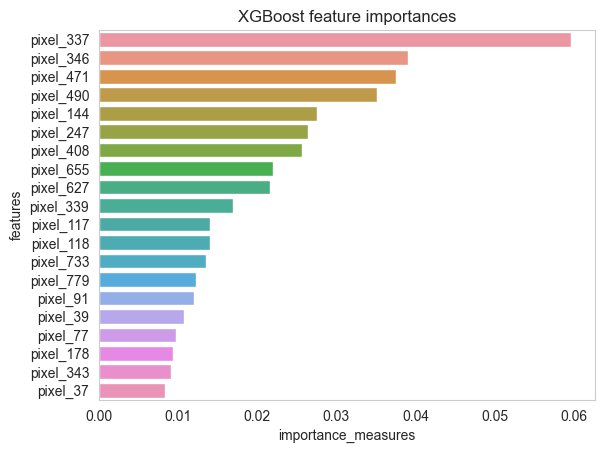

In [96]:
sns.barplot(x = "importance_measures", y ="features", data = df_feature_importance.iloc[:20, :])
plt.title("XGBoost feature importances")

### Let's try to understand the explanation of model prediction using SHAP

#### install the library using --> pip install shap

In [ ]:
# xgb_explainer = shap.Explainer(xgb_model_fin)

In [ ]:
# xgb_explainer.shap_values(X_test[:20, :])

To Do : Explore below
- joblib
- dask
- cupy
- cudf
- https://examples.dask.org/machine-learning.html